# Term Project - SCS3251 Statistics for Data Science

## Members
- Dherya Jain
- Lidia Rodionova
- Joubin Najmaie

## Project Objective
To predict the overall building evaluation score based on characteristics such as building age, ward, and property type features, in order to proactively identify buildings at risk of poor compliance or requiring inspection.

## High Level Steps
- Hypothesis Test 1 - YEAR BUILT vs. Building Score
- Hypothesis Test 2 - WARD vs. Building Score
- Hypothesis Test 3 - PROPERTY TYPE vs. Building Score
- Build a predictive model using linear regression

## Data Preparation
### Data Sources:
- City of Toronto - Apartment Building Evaluation https://open.toronto.ca/dataset/apartment-building-evaluation/
    - contains two data sets. One contains pre-2023 apartment evaluations and one contains apartment evalutions from 2023 until present day. We have used the 2023+ data set in this analysis.
- Additional data - Ward Profiles from City of Toronto: https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/ward-profiles/

These datasets were chosen because of their high scores for data quality (Overall score: 96%, Grade: Gold) and because there were enough data rows (3500+) to do a thorough analysis.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import scipy.stats as stats

In [60]:
# import matplotlib.pyplot as plt # I don't think you need to import it again? LR

def plotDist(df, title, xlabel, ylabel):
    # Plot the distribution
    plt.figure(figsize=(7, 4))
    plt.hist(df, bins=30, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [58]:
# upload data into DataFrame
apartmentEvalDf = pd.read_csv("Apartment Building Evaluations 2023 - current.csv", encoding='latin-1')
original_df = apartmentEvalDf.copy()
# apartmentEvalDf.head(2)

,_id,RSN,YEAR REGISTERED,YEAR BUILT,YEAR EVALUATED,PROPERTY TYPE,WARD,WARDNAME,SITE ADDRESS,CONFIRMED STOREYS,...,CLEANING LOG,VITAL SERVICE PLAN,ELECTRICAL SAFETY PLAN,STATE OF GOOD REPAIR PLAN,TENANT SERVICE REQUEST LOG,GRID,LATITUDE,LONGITUDE,X,Y
0,1,4897867,2021.0,2020.0,2023,PRIVATE,11,University-Rosedale,99 GERRARD ST W,32,...,3,3,3,3,3,S1145,NaN,NaN,313970.923,4835138.057
1,2,4153580,2017.0,1930.0,2023,PRIVATE,13,Toronto Centre,26 GIFFORD ST,4,...,3,3,3,3,3,S1327,43.663338,-79.363691,315777.607,4835719.536


In [59]:
#apartmentEvalDf.describe()

Drop columns that will not be used for modeling

In [21]:
colsToDrop = [
    '_id',
    'RSN',
    'GRID',
    'LATITUDE',
    'YEAR REGISTERED',
    'YEAR EVALUATED',
    'EVALUATION COMPLETED ON',
    'LONGITUDE',
    'X',
    'Y',
    'WARDNAME',
    'SITE ADDRESS',
    'TENANT NOTIFICATION BOARD',
    'PEST CONTROL LOG',
    'MAINTENANCE LOG',
    'CLEANING LOG',
    'TENANT SERVICE REQUEST LOG'
    ]

apartmentEvalDf.drop(colsToDrop, axis=1, errors='ignore', inplace=True)

In [22]:
from datetime import datetime
current_year = datetime.now().year

# Add a new column called 'BUILDING AGE' (current year - year column)
apartmentEvalDf['BUILDING AGE'] = current_year - apartmentEvalDf['YEAR BUILT']

In [23]:
apartmentEvalDf.head(5)

,YEAR BUILT,PROPERTY TYPE,WARD,CONFIRMED STOREYS,CONFIRMED UNITS,CURRENT BUILDING EVAL SCORE,PROACTIVE BUILDING SCORE,CURRENT REACTIVE SCORE,NO OF AREAS EVALUATED,NUMBERING OF PROPERTY,...,STAIRWELL LIGHTING,INT. HANDRAIL / GUARD - SAFETY,INT. HANDRAIL / GUARD - MAINT.,GRAFFITI,BUILDING CLEANLINESS,COMMON AREA PESTS,VITAL SERVICE PLAN,ELECTRICAL SAFETY PLAN,STATE OF GOOD REPAIR PLAN,BUILDING AGE
0,2020.0,PRIVATE,11,32,275,98.0,98.0,0,46,3,...,3.0,3.0,3.0,3,3,3,3,3,3,5.0
1,1930.0,PRIVATE,13,4,15,93.0,93.0,0,36,3,...,3.0,3.0,1.0,3,3,3,3,3,3,95.0
2,1960.0,PRIVATE,9,3,29,75.0,75.0,0,37,3,...,3.0,1.0,2.0,3,3,3,1,1,1,65.0
3,1960.0,PRIVATE,9,3,23,80.0,80.0,0,37,3,...,2.0,1.0,3.0,3,3,3,1,1,1,65.0
4,1954.0,PRIVATE,21,14,192,89.0,89.0,0,44,3,...,3.0,3.0,3.0,3,2,3,3,3,1,71.0


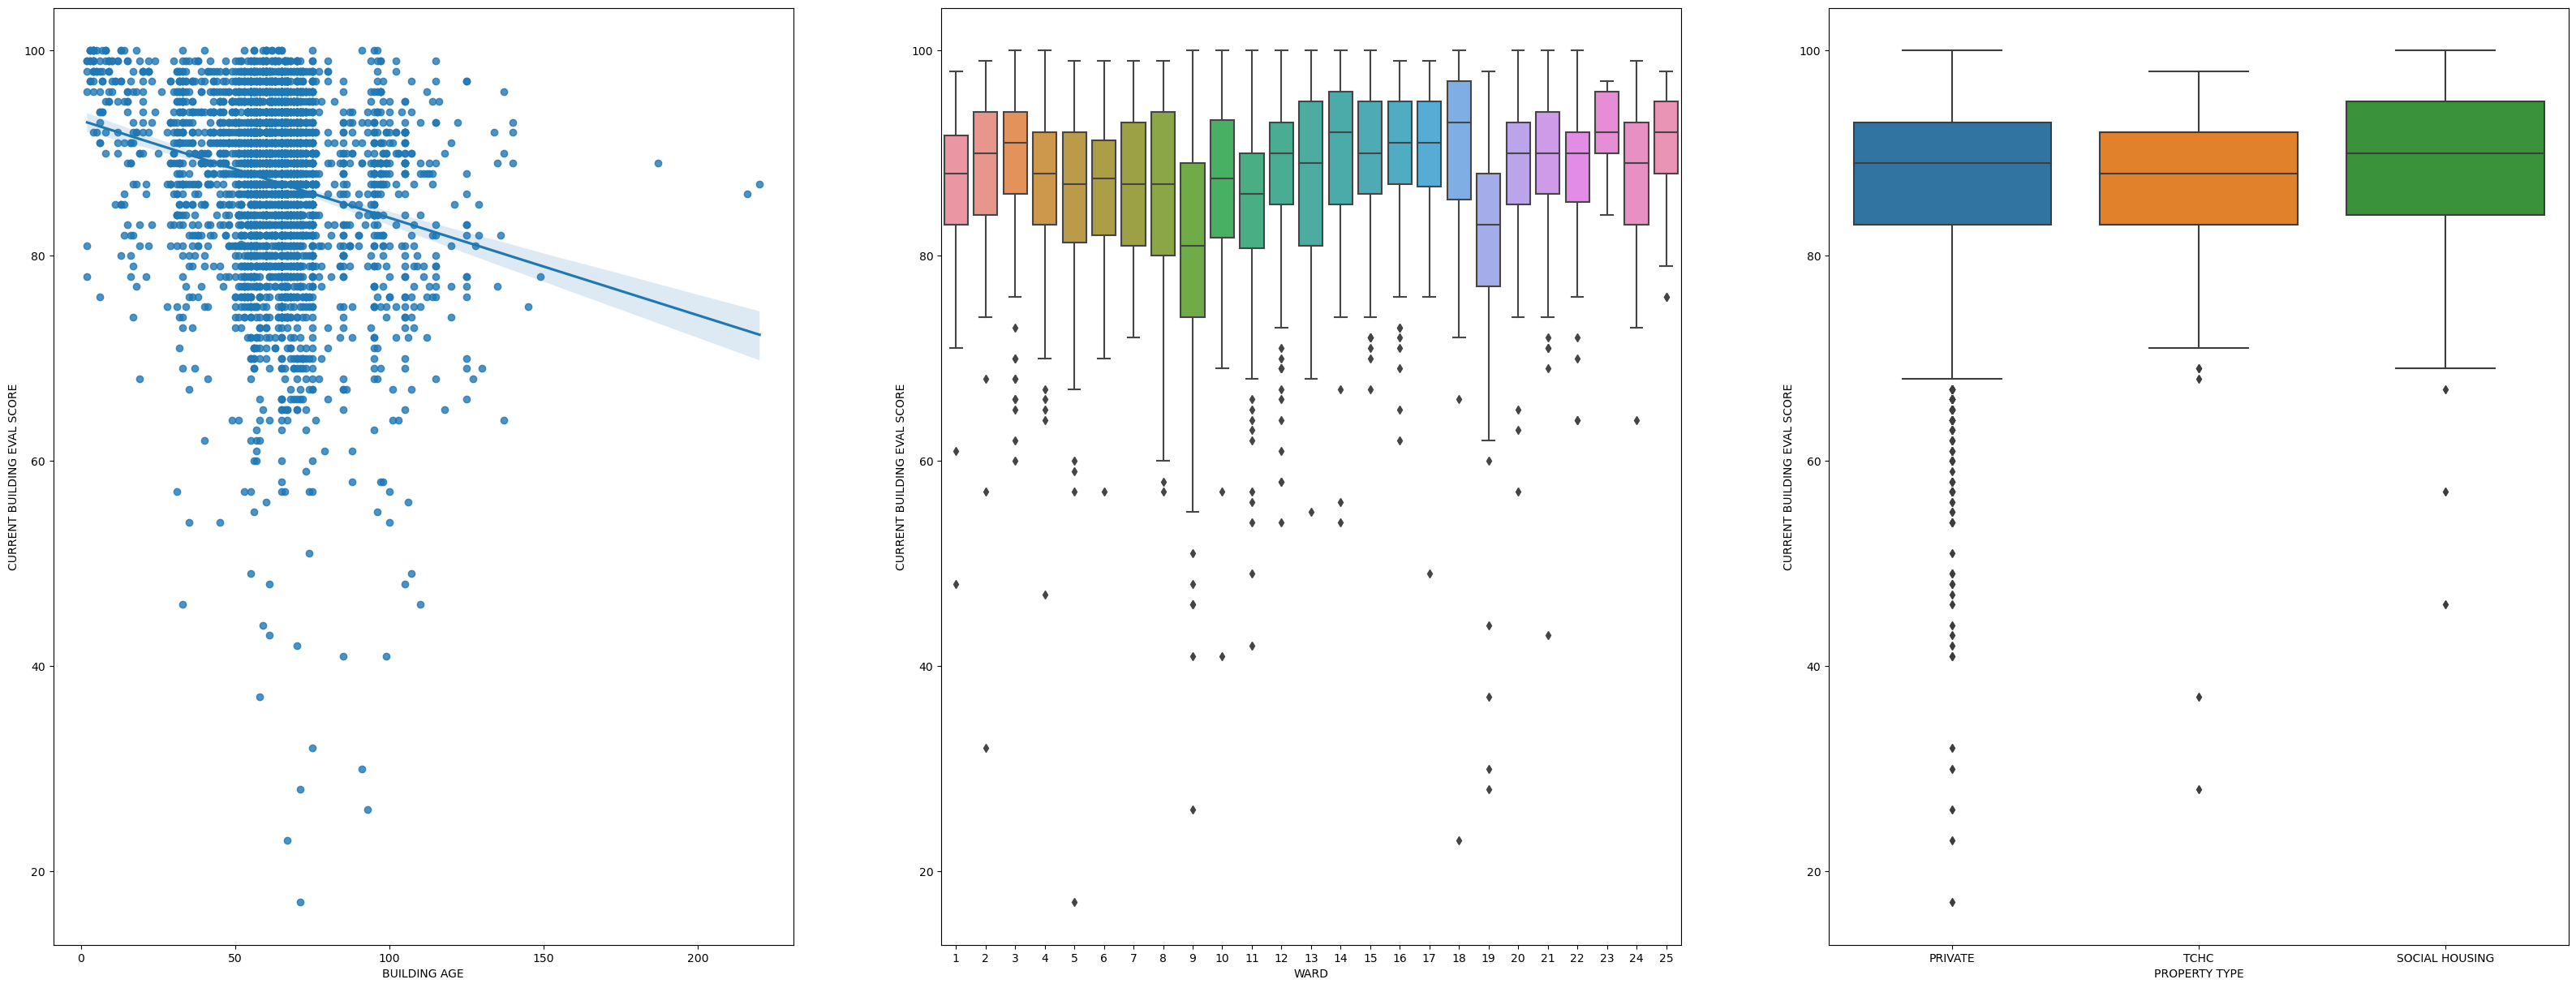

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_figwidth(40)
fig.set_figheight(15)

ax1 = sns.regplot(x=apartmentEvalDf['BUILDING AGE'], y=apartmentEvalDf['CURRENT BUILDING EVAL SCORE'], ax=ax1)
ax2 = sns.boxplot(x=apartmentEvalDf['WARD'], y=apartmentEvalDf['CURRENT BUILDING EVAL SCORE'], ax=ax2)
ax3 = sns.boxplot(x=apartmentEvalDf['PROPERTY TYPE'], y=apartmentEvalDf['CURRENT BUILDING EVAL SCORE'], ax=ax3)

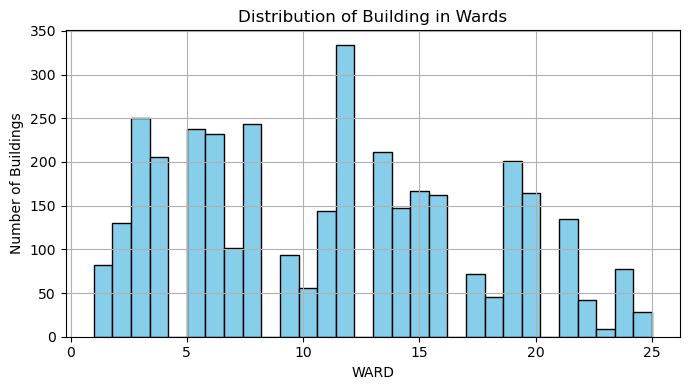

In [25]:
plotDist(apartmentEvalDf['WARD'].dropna(), 'Distribution of Building in Wards', 'WARD', 'Number of Buildings')

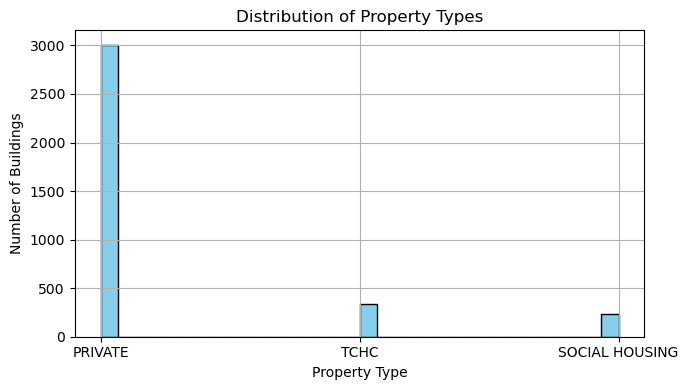

In [26]:
plotDist(apartmentEvalDf['PROPERTY TYPE'].dropna(), 'Distribution of Property Types', 'Property Type', 'Number of Buildings')

In [27]:
# Calculate the mean of YEAR BUILT and CURRENT BUILDING EVAL SCORE,
# dropping rows where either value is missing
mean_values = apartmentEvalDf[['BUILDING AGE', 'CURRENT BUILDING EVAL SCORE']].dropna().mean()
mean_values

BUILDING AGE                   62.836895
CURRENT BUILDING EVAL SCORE    87.218251
dtype: float64

In [28]:
stddev_values = apartmentEvalDf[['BUILDING AGE', 'CURRENT BUILDING EVAL SCORE']].dropna().std()
stddev_values

BUILDING AGE                   20.196624
CURRENT BUILDING EVAL SCORE     8.736644
dtype: float64

# Hypothesis Test 1 - YEAR BUILT vs. Building Score

Test whether older or newer buildings have different average evaluation scores.

Goal: Test whether older or newer buildings have different average evaluation scores.

- H0: There is no relationship between year built and building score.
- H1: There is a statistically significant relationship between year built and building score.


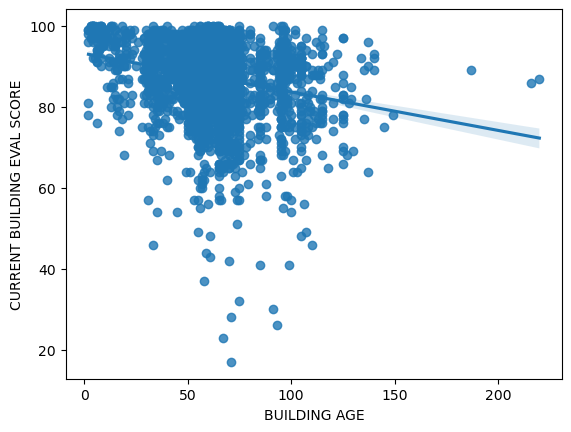

In [29]:
sns.regplot(x=apartmentEvalDf['BUILDING AGE'], y=apartmentEvalDf['CURRENT BUILDING EVAL SCORE'])
plt.show()

Assuming that the null-hypothesis is true, calculate the the correlation and the p-value as indicators of:
- The probability of getting extreme values as the ones observed
- The strength of the relationship between building age and score

In [30]:
from scipy.stats import pearsonr

valid_data = apartmentEvalDf[['BUILDING AGE', 'CURRENT BUILDING EVAL SCORE']].dropna()
corr, p_value = pearsonr(valid_data['BUILDING AGE'], valid_data['CURRENT BUILDING EVAL SCORE'])
print(f"Correlation: {corr:.3f}")
print(f"p-value: {p_value:.3g}")


Correlation: -0.219
p-value: 4.83e-40


## Conclusion

The observed data is unlikely under H0​, therefore reject the null hypothesis i.e. there is significant statistical importance between the building age and building score.

It suggests: "On average, older buildings score slightly lower, but the pattern isn't very strong."

# Hypothesis Test 2 - WARD vs. Building Score

Test whether buildings in different wards have different average scores.

Goal: Test whether buildings in different wards have different average scores.

- H0: The average building score is the same across all wards.
- H1: At least one ward has a different average building score.

In [137]:
# data prep for hypothesis test 2
apartmentEvalDfH2 = apartmentEvalDf 

ward_incomes = {1: ['Etobicoke North', 95200], 
                2: ['Etobicoke Centre', 146600],
                3: ['Etobicoke-Lakeshore', 127200],
                4: ['Parkdale-High Park', 127200],
                5: ['York South-Weston', 88700],
                6: ['York Centre', 107500],
                7: ['Humber River-Black Creek', 85700],
                8: ['Eglinton-Lawrence', 176400],
                9: ['Davenport', 107300 ],
                10: ['Spadina-Fort York', 118200],
                11: ['University-Rosedale', 174800],
                12: ['Toronto-St. Paul\'s', 160400 ],
                13: ['Toronto Centre', 89400],
                14: ['Toronto-Danforth', 130800],
                15: ['Don Valley West', 224800],
                16: ['Don Valley East', 100300],
                17: ['Don Valley North', 103800 ],
                18: ['Willowdale', 106300],
                19: ['Beaches-East York', 130600],
                20: ['Scarborough Southwest', 102200],
                21: ['Scarborough-Centre', 91500],
                22: ['Scarborough-Agincourt', 93000],
                23: ['Scarborough North', 100000],
                24: ['Scarborough-Guildwood', 92700],
                25: ['Scarborough-Rouge Park', 121800 ]}

# Add avg income column to data frame
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 1, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(1)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 2, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(2)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 3, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(3)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 4, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(4)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 5, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(5)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 6, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(6)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 7, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(7)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 8, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(8)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 9, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(9)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 10, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(10)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 11, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(11)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 12, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(12)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 13, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(13)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 14, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(14)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 15, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(15)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 16, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(16)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 17, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(17)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 18, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(18)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 19, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(19)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 20, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(20)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 21, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(21)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 22, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(22)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 23, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(23)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 24, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(24)[1]
apartmentEvalDfH2.loc[apartmentEvalDfH2['WARD'] == 25, 'AVERAGE_HOUSEHOLD_INCOME'] = ward_incomes.get(25)[1]

# drop unused columns
colsToDrop = ['LATITUDE', 
            'LONGITUDE', 
            'X', 
            'Y', 
            'GRID', 
            'TENANT SERVICE REQUEST LOG', 
            'STATE OF GOOD REPAIR PLAN', 
            'ELECTRICAL SAFETY PLAN',
            'VITAL SERVICE PLAN', 
            'CLEANING LOG', 
            'MAINTENANCE LOG', 
            'PEST CONTROL LOG', 
            'TENANT NOTIFICATION BOARD', 
            'COMMON AREA PESTS',
            'BUILDING CLEANLINESS', 
            'GRAFFITI', 
            'INT. HANDRAIL / GUARD - MAINT.', 
            'INT. HANDRAIL / GUARD - SAFETY', 
            'STAIRWELL LIGHTING', 
            'STAIRWELL - LANDING AND STEPS', 
            'STAIRWELL - WALLS AND CEILING', 
            'CHUTE ROOMS - MAINTENANCE', 
            'ELECTRICAL SERVICES / OUTLETS', 
            'COMMON AREA VENTILATION', 
            'INT. LOBBY / HALLWAY LIGHTING', 
            'INT. HANDRAIL / GUARD - MAINT.',
            'INTERIOR HALLWAY FLOORS', 
            'INT. HALLWAY - WALLS / CEILING',
            'ELEVATOR COSMETICS', 
            'ELEVATOR MAINTENANCE',
            'GARBAGE/COMPACTOR ROOM', 
            'ABANDONED EQUIP./DERELICT VEH.',
            'PARKING AREAS', 
            'OTHER AMENITIES', 
            'POOLS', 
            'STORAGE AREAS/LOCKERS MAINT.',
            'EXTERIOR DOORS', 
            'MAIL RECEPTACLES', 
            'INT. RECEPTACLE STORAGE AREA', 
            'LAUNDRY ROOM', 
            'LOBBY FLOORS', 
            'LOBBY - WALLS AND CEILING', 
            'EMERGENCY CONTACT SIGN', 
            'INTERCOM', 
            'ACCESSORY BUILDINGS', 
            'CLOTHING DROP BOXES', 
            'EXTERIOR WALKWAYS', 
            'EXT. RECEPTACLE STORAGE AREA', 
            'WINDOWS', 
            'BALCONY GUARDS', 
            'BUILDING EXTERIOR',
            'CATCH BASINS / STORM DRAINAGE',
            'RETAINING WALLS', 
            'FENCING', 
            'EXTERIOR GROUNDS',
            'NUMBERING OF PROPERTY', 
            'NO OF AREAS EVALUATED', 
            'CONFIRMED STOREYS', 
            'SITE ADDRESS',
            'PROACTIVE BUILDING SCORE',
            'CURRENT REACTIVE SCORE',
            'VALUATION COMPLETED ON',
            'CONFIRMED UNITS',
            'WARDNAME',
            'YEAR EVALUATED',
            'YEAR BUILT',
            'YEAR REGISTERED',
            'RSN']

apartmentEvalDfH2.drop(colsToDrop, axis=1, errors='ignore', inplace=True)
apartmentEvalDfH2.head(2)

,_id,PROPERTY TYPE,WARD,EVALUATION COMPLETED ON,CURRENT BUILDING EVAL SCORE,AVERAGE_HOUSEHOLD_INCOME
0,1,PRIVATE,11,2023-10-24,98.0,174800.0
1,2,PRIVATE,13,2023-07-21,93.0,89400.0


In [138]:
# HYPOTHESIS 2 CONTINUED
significance_level = 0.05
population_mean = apartmentEvalDf.loc[:, 'CURRENT BUILDING EVAL SCORE'].mean()
sd = statistics.stdev(list(apartmentEvalDf.loc[:, 'CURRENT BUILDING EVAL SCORE']))

def get_sample_size(wardData):
    return len(wardData.index)

def get_sample_mean(wardData):
    return wardData['CURRENT BUILDING EVAL SCORE'].mean()
   
def calc_zscore(sample_size, sample_mean):
    #calculate zscore
    sqrt_sample_size = math.sqrt(sample_size)
    zscore = statistics.NormalDist(population_mean, sd/sqrt_sample_size).zscore(sample_mean)
    return zscore

def calc_pvalue(zscore):
    p_value_15 = stats.norm.cdf(zscore)
    return p_value_15

def print_results(wardData):
    zscore = calc_zscore(get_sample_size(wardData), get_sample_mean(wardData))
    calc_pvalue(zscore)
    print(calc_pvalue(zscore))

# Top richest & poorest wards
print('top richest wards: ', sorted(ward_incomes.items(), key=lambda x: x[1][1], reverse=True)[:5])
print('top poorest wards: ', sorted(ward_incomes.items(), key=lambda x: x[1][1])[:5])

ward5Evals = apartmentEvalDf.loc[apartmentEvalDf['WARD'] == 5]
ward7Evals = apartmentEvalDf.loc[apartmentEvalDf['WARD'] == 7]
ward8Evals = apartmentEvalDf.loc[apartmentEvalDf['WARD'] == 8]
ward11Evals = apartmentEvalDf.loc[apartmentEvalDf['WARD'] == 11]
ward12Evals = apartmentEvalDf.loc[apartmentEvalDf['WARD'] == 12]
ward15Evals = apartmentEvalDf.loc[apartmentEvalDf['WARD'] == 15]
ward21Evals = apartmentEvalDf.loc[apartmentEvalDf['WARD'] == 21]
ward24Evals = apartmentEvalDf.loc[apartmentEvalDf['WARD'] == 24]

# Print probability for richest wards
print('Ward 15 ($224,800):')
print(get_sample_mean(ward15Evals))
print_results(ward15Evals)

print('Ward 8:')
print(get_sample_mean(ward8Evals))
print_results(ward8Evals)

print('Ward 11:')
print(get_sample_mean(ward11Evals))
print_results(ward11Evals)

print('Ward 12:')
print(get_sample_mean(ward12Evals))
print_results(ward12Evals)

print('Ward 2:')
print(get_sample_mean(ward2Evals))
print_results(ward2Evals)

# bottom 5 poorest wards:
print('Ward 24:')
print(get_sample_mean(ward24Evals))
print_results(ward24Evals)

print('Ward 21:')
print(get_sample_mean(ward21Evals))
print_results(ward21Evals)

print('Ward 13:')
print(get_sample_mean(ward13Evals))
print_results(ward13Evals)

print('Ward 5:')
print(get_sample_mean(ward5Evals))
print_results(ward5Evals)

print('Ward 7:')
print(get_sample_mean(ward7Evals))
print_results(ward7Evals)

top richest wards:  [(15, ['Don Valley West', 224800]), (8, ['Eglinton-Lawrence', 176400]), (11, ['University-Rosedale', 174800]), (12, ["Toronto-St. Paul's", 160400]), (2, ['Etobicoke Centre', 146600])]
top poorest wards:  [(7, ['Humber River-Black Creek', 85700]), (5, ['York South-Weston', 88700]), (13, ['Toronto Centre', 89400]), (21, ['Scarborough-Centre', 91500]), (24, ['Scarborough-Guildwood', 92700])]
Ward 15 ($224,800):
89.18562874251496
0.9984577603001661
Ward 8:
86.04508196721312
0.02184752788515313
Ward 11:
84.23611111111111
2.8510039462212232e-05
Ward 12:
88.4880239520958
0.9968442712009115
Ward 2:
88.03076923076924
0.8663720523316683
Ward 24:
87.88311688311688
0.7599285940668861
Ward 21:
88.8
0.9842102255830855
Ward 13:
87.92924528301887
0.8940150566536188
Ward 5:
85.52521008403362
0.001826969053594693
Ward 7:
86.79207920792079
0.32937110847250617


Text(70, 0.02, 'Alternative Hypothesis (orange)')

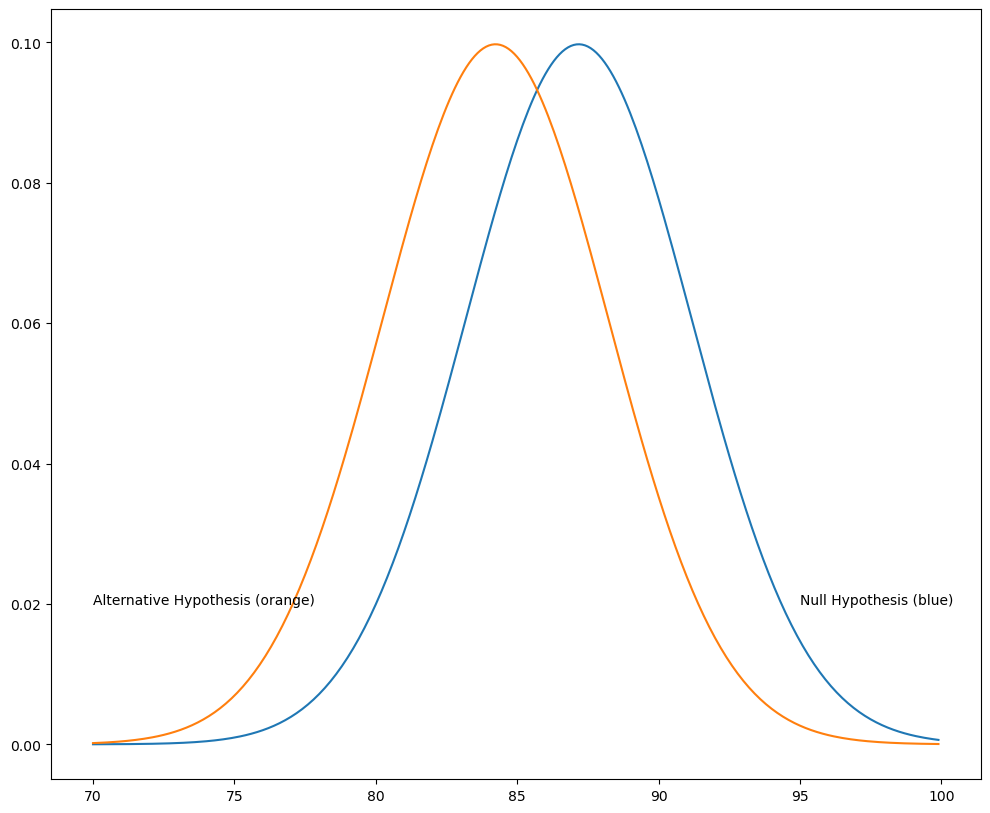

In [136]:
# Hypothesis 2 - Graph comparing Ward 7 and general population
plt.figure(figsize=(12,10))

x1=np.arange(70,100,0.1)
y1= stats.norm.pdf(np.arange(70,100,0.1), loc=population_mean, scale=4)
plt.plot(x1,y1)

plt.plot(x1=np.arange(70,100.0,0.1), y2= stats.norm.pdf(np.arange(50,100,0.1), loc=population_mean, scale=4))

x2=np.arange(70,100.0,0.1)
y2= stats.norm.pdf(np.arange(70,100.0,0.1),loc = get_sample_mean(ward11Evals), scale=4)
plt.plot(x2,y2)

plt.text(x=95, y=0.02, s= "Null Hypothesis (blue)")
plt.text(x=70, y=0.02, s= "Alternative Hypothesis (orange)")

# Hypothesis Test 3 - PROPERTY TYPE vs. Building Score

Determine if the average building score differs by property type (e.g. PRIVATE, TCHC, etc.) or different property types have significantly different mean scores

Goal: Determine if the average building score differs by property type (e.g. PRIVATE, TCHC, etc.)

- H0: The mean building score is the same across all property types.
- H1: At least one property type has a different mean building score.

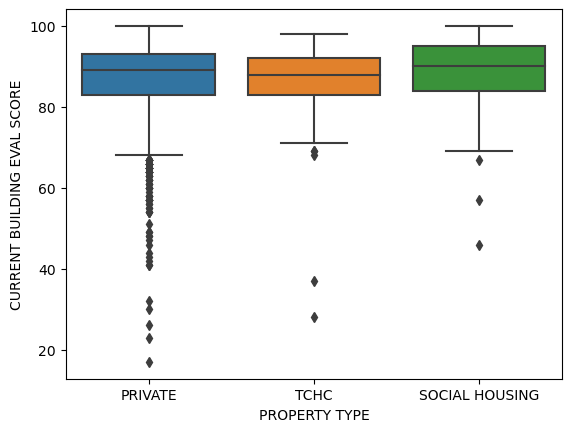

In [34]:
sns.boxplot(x=apartmentEvalDf['PROPERTY TYPE'], y=apartmentEvalDf['CURRENT BUILDING EVAL SCORE'])
plt.show()

## Used Analysis: ANOVA (Analysis Of Variance)

In [35]:
from scipy.stats import f_oneway

filtered_df = apartmentEvalDf[['PROPERTY TYPE', 'CURRENT BUILDING EVAL SCORE']].dropna()

# Group scores by property type
grouped_scores = filtered_df.groupby('PROPERTY TYPE')['CURRENT BUILDING EVAL SCORE'].apply(list)

# Perform ANOVA
anova_result = f_oneway(*grouped_scores)

print(f"F-statistics: {anova_result.statistic:.3f}")
print(f"p-value: {anova_result.pvalue:.4f}")

F-statistics: 4.878
p-value: 0.0077


## Conclusion

Based on the ANOVA test results of the F-statistics being much larger than 1 and the low p-value, the data suggests that the mean of the building scores across the three groups is unlikely due to chance and therefore we can reject H0: The mean building score is the same across all property types.

However examining the boxplots for the three groups visually indicate that the median are quite similar. Note that by looking at the boxplot, we can also see the following noticeable differences:

1. The width of the boxes are different, indicating the difference in variances in each group
2. There are more outliers in the PRIVATE group

### Putting the two results togther

Even though the data analysis indicates there is statistical signficant evidence to reject the null hypothesis, due to the high level of variance. However due to the many outliers in the PRIVATE group, it could be that in practice the three groups are more similar.

## Linear Regression

In [36]:

colsToDrop = [
    '_id',
    'RSN',
    'YEAR REGISTERED',
    'YEAR BUILT',
    'YEAR EVALUATED',
    'WARD',
    'SITE ADDRESS',
    'EVALUATION COMPLETED ON',
    'CURRENT REACTIVE SCORE',
    'PROACTIVE BUILDING SCORE',
    'NO OF AREAS EVALUATED',
    'GRID',
    'LATITUDE',
    'LONGITUDE',
    'X',
    'Y',
    'PROPERTY TYPE',
    'WARDNAME'
    ]

original_df.drop(colsToDrop, axis=1, errors='ignore', inplace=True)
original_df.fillna(0, inplace=True)
original_df.replace(['N/A', ' N/A'], 0, inplace=True)

display(original_df)

,CONFIRMED STOREYS,CONFIRMED UNITS,CURRENT BUILDING EVAL SCORE,NUMBERING OF PROPERTY,EXTERIOR GROUNDS,FENCING,RETAINING WALLS,CATCH BASINS / STORM DRAINAGE,BUILDING EXTERIOR,BALCONY GUARDS,...,BUILDING CLEANLINESS,COMMON AREA PESTS,TENANT NOTIFICATION BOARD,PEST CONTROL LOG,MAINTENANCE LOG,CLEANING LOG,VITAL SERVICE PLAN,ELECTRICAL SAFETY PLAN,STATE OF GOOD REPAIR PLAN,TENANT SERVICE REQUEST LOG
0,32,275,98.0,3,3.0,3,3.0,3.0,3.0,3.0,...,3,3,3,3,3,3,3,3,3,3
1,4,15,93.0,3,3.0,3,0.0,0.0,2.0,0.0,...,3,3,3,3,3,3,3,3,3,3
2,3,29,75.0,3,3.0,2,0.0,3.0,1.0,0.0,...,3,3,1,3,3,3,1,1,1,3
3,3,23,80.0,3,3.0,2,3.0,0.0,2.0,0.0,...,3,3,1,3,3,2,1,1,1,3
4,14,192,89.0,3,2.0,3,0.0,3.0,3.0,1.0,...,2,3,2,3,1,3,3,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,4,38,88.0,3,3.0,2,2.0,0.0,2.0,0.0,...,2,3,3,3,3,3,3,1,3,3
3569,5,97,81.0,2,2.0,3,3.0,3.0,2.0,3.0,...,2,3,2,3,3,1,3,1,3,3
3570,7,64,95.0,3,3.0,0,0.0,0.0,3.0,3.0,...,3,3,1,1,3,3,3,3,1,3
3571,6,59,68.0,3,3.0,2,3.0,3.0,3.0,3.0,...,2,3,1,0,0,0,0,0,0,0


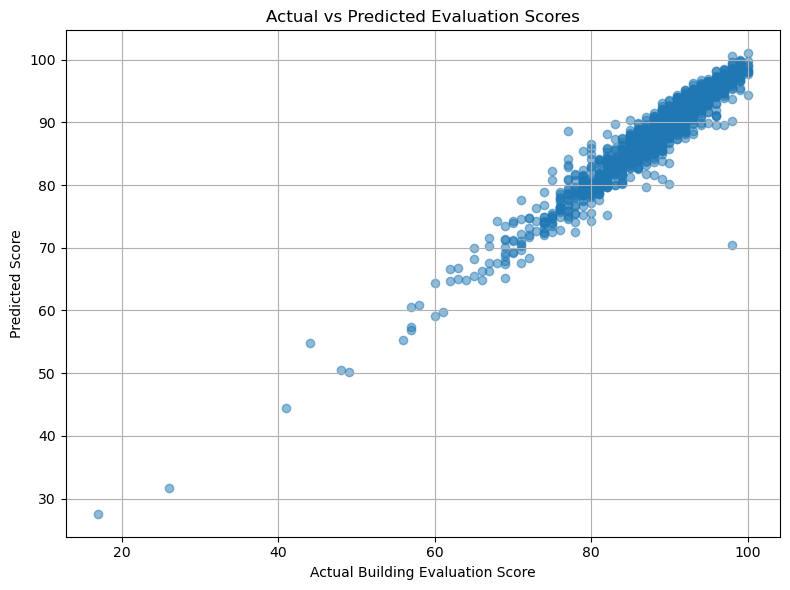

R-squared: 0.931
Root Mean Squared Error: 2.2331


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Features and target
X = original_df.drop('CURRENT BUILDING EVAL SCORE', axis=1)
y = original_df['CURRENT BUILDING EVAL SCORE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Building Evaluation Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Evaluation Scores')
plt.grid(True)
plt.tight_layout()
plt.show()

(r2, rmse)

print(f"R-squared: {r2:.3f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

# Conclusion

- An R-squared of 0.93 means that this model explains close to 93% of the variability in the response variable.
- An RMSE of 2.23, the model's predictions are off by 2.23 points on average.